## Experiments: Scalability Number of Series RSAST

In [1]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram']

### Overall analysis

In [2]:
import time 
import os 
import gc
import numpy as np

import sys
sys.path.append(os.path.abspath("."))

from utils_sast import *
from sast import *

from sklearn.linear_model import RidgeClassifierCV

from sast import from_2d_array_to_nested
from sktime.classification.kernel_based import RocketClassifier
#from sktime.transformations.panel.shapelets import *

from sktime.datasets import load_UCR_UEA_dataset
from matplotlib.ticker import FuncFormatter

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


In [6]:


dataset_folder = '/home/local.isima.fr/mimbouop/Univariate_arff' # the folder containing the datasets
ds = 'Chinatown' # the dataset to use


columns = ('series_length','SAST-train', 'SAST-test', 'SAST-appox-train', 'SAST-approx-test', 'SASTE-train', 'SASTE-test', 'SASTE-approx-train', 'SASTE-approx-test', 'STC-train', 'STC-test') # columns of the output file

min_shp_length = 3 # min candidate length

output_file = 'results/results-scalability-series-length-contracted.csv' # the name of the result file

#max_exponent = 20 # go up to series of length 2^max_exponent

max_exponent = 5 # go up to series of length 2^max_exponent

X_train_base, y_train_base = load_UCR_UEA_dataset(name=ds, extract_path='data', split="train", return_type="numpy2d")
X_test, y_test = load_UCR_UEA_dataset(name=ds, extract_path='data', split="test", return_type="numpy2d")
    
# fill na
#train_ds.fillna(0, axis=1, inplace=True)
#test_ds.fillna(0, axis=1, inplace=True)

#X_train_all, y_train = format_dataset(train_ds, shuffle=True)
#X_test_all, y_test_all = format_dataset(test_ds)

df_result = {}
list_score = []
list_time_fit = []
list_time_test = []
list_dataset = []
list_hyperparameter = []
list_method = []
list_rpoint = []
list_nb_per_class = []
list_number_series = []

for i in range(4, max_exponent+1):

    nb_series = 2**i

    idx = np.random.choice(np.arange(len(y_train_base)), size=nb_series, replace=True)
    X_train = X_train_base[idx]
    y_train = y_train_base[idx]

    print('Shape:', X_train.shape)

    max_shp_length = X_train.shape[1]

    print("--number_series: 2^"+str(i))

    p=30
    k=1
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)


    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    p=10
    k=10
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()

    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)
    """

    """
    p=10
    k=10
    print("RSAST All: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="all", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("All: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST All")
    list_number_series.append(nb_series)

    print("ROCKET: kernels=10_000")
    
    clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    
    start = time.time()
    rocket= Rocket(num_kernels=10_000)
    rocket.fit(X_train,y_train)
    X_train_transformed=rocket.transform(X_train)
    clf.fit(X_train_transformed, y_train)
    
    
    end = time.time()
    time_fit=end-start

    start = time.time()
    X_test_transformed=rocket.transform(X_test)
    score=clf.score(X_test,y_test)
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ROCKET: num_kernels=10_000")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("Rocket")
    list_number_series.append(nb_series)

    '''
    min_shp_length = 3
    print("STC: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(np.inf))

    max_shp_length = X_train.shape[1]
    start = time.time()
    #Creating a ShapeletTransform and fitting
    st = ShapeletTransform(min_shapelet_length=min_shp_length, max_shapelet_length=np.inf)
    X_train_sktime = from_2d_array_to_nested(pd.DataFrame(X_train))
    X_test_sktime = from_2d_array_to_nested(pd.DataFrame(X_test))
    st.fit(X_train_sktime, y_train)
    #Making the tranformation of time series and training a RandomForestClassifier model
    X_test_transformed = st.transform(X_test_sktime)
    X_train_transformed = st.transform(X_train_sktime)
    clf = RandomForestClassifier()
    clf.fit(X_train_transformed, y_train)

    end = time.time()
    list_score.append(clf.score(X_test_transformed, y_test))
    list_time.append(end-start)
    list_dataset.append(ds)
    list_hyperparameter.append("min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(max_shp_length))
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("STC")  
    '''
    k=1

    #candidate_lengths = np.arange(min_shp_length, max_shp_length+1)

    min_shp_length = 3
    max_shp_length = X_train.shape[1]
    candidate_lengths = np.arange(3, max_shp_length)
    min_shp_length = min(candidate_lengths)
    max_shp_length = max(candidate_lengths)
    print("SAST: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(X_train.shape[1]))
    start = time.time()


    sast_ridge = SAST(cand_length_list=candidate_lengths,
                            nb_inst_per_class=k, classifier=clf)

    sast_ridge.fit(X_train, y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    score=sast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("SAST: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length=m")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("SAST")  
    list_number_series.append(nb_series)


df_result['accuracy']=list_score
df_result['time_fit']=list_time_fit
df_result['time_test']=list_time_test
df_result['dataset_name']=list_dataset
df_result['hyperparameter']=list_hyperparameter
df_result['rpoint']=list_rpoint
df_result['nb_per_class']=list_nb_per_class
df_result['classifier_name']=list_method
df_result['number_series']=list_number_series

df_result=pd.DataFrame(df_result)
# export a overall dataset with the comparison
df_result.to_csv("results_comparison_accuracy/df_overall_comparison_scalability_number_of_series.csv")


print('--All done')


Shape: (16, 24)
--number_series: 2^4
RSAST ACF&PACF: n_random_points=30 nb_inst_per_class=1
total kernels:71
RSAST ACF&PACF: n_random_points=10 nb_inst_per_class=10
total kernels:400
RSAST All: n_random_points=10 nb_inst_per_class=10
total kernels:2800
ROCKET: kernels=10_000


ValueError: Found input variables with inconsistent numbers of samples: [1, 16]

In [3]:
X_train_base, y_train_base = load_UCR_UEA_dataset(name=ds, extract_path='data', split="train", return_type="numpy2d")
X_test, y_test = load_UCR_UEA_dataset(name=ds, extract_path='data', split="test", return_type="numpy2d")

NameError: name 'ds' is not defined

In [ ]:
X_train_base

array([[ 573.,  375.,  301.,  212.,   55.,   34.,   25.,   33.,  113.,
         143.,  303.,  615., 1226., 1281., 1221., 1081.,  866., 1096.,
        1039.,  975.,  746.,  581.,  409.,  182.],
       [ 394.,  264.,  140.,  144.,  104.,   28.,   28.,   25.,   70.,
         153.,  401.,  649., 1216., 1399., 1249., 1240., 1109., 1137.,
        1290., 1137.,  791.,  638.,  597.,  316.],
       [ 603.,  348.,  176.,  177.,   47.,   30.,   40.,   42.,  101.,
         180.,  401.,  777., 1344., 1573., 1408., 1243., 1141., 1178.,
        1256., 1114.,  814.,  635.,  304.,  168.],
       [ 428.,  309.,  199.,  117.,   82.,   43.,   24.,   64.,  152.,
         183.,  408.,  797., 1288., 1491., 1523., 1460., 1365., 1520.,
        1700., 1797., 1596., 1139.,  910.,  640.],
       [ 372.,  310.,  203.,  133.,   65.,   39.,   27.,   36.,  107.,
         139.,  329.,  651.,  990., 1027., 1041.,  971., 1104.,  844.,
        1023., 1019.,  862.,  643.,  591.,  452.],
       [ 448.,  344.,  183.,  146.,

In [ ]:
rocket= RocketClassifier(num_kernels=10_000)
rocket.fit(X_train_base,y_train_base)

rocket.score(X_test,y_test)

0.9825072886297376

In [ ]:
df_result=pd.read_csv("results_comparison_accuracy/df_overall_comparison_scalability_number_of_series.csv")

df_result["log_number_series"]=np.log2(df_result.number_series).round(0)
df_result["log_runtime_fit"]=np.log10(df_result.time_fit).round(0)

xtick_label=[  5.,  6.,  7.,  8., 9, 10]
df_result=df_result[df_result["log_number_series"].isin(xtick_label)]


In [ ]:
df_result.columns

Index(['Unnamed: 0', 'accuracy', 'time_fit', 'time_test', 'dataset_name',
       'hyperparameter', 'rpoint', 'nb_per_class', 'classifier_name',
       'number_series', 'log_number_series', 'log_runtime_fit'],
      dtype='object')

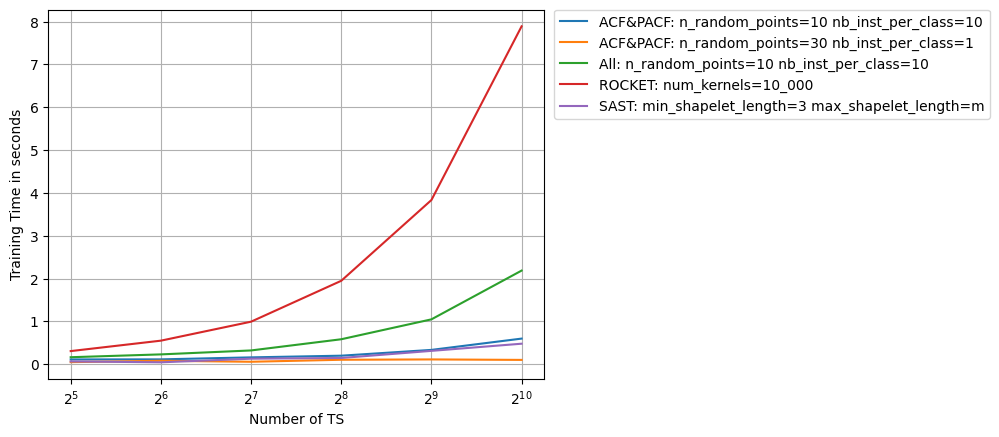

In [ ]:
df_result.pivot_table(values="time_fit", index="log_number_series", columns="hyperparameter").plot.line(grid=True, xlabel="Number of TS", ylabel="Training Time in seconds")


#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Define the custom formatter function
def exponent_of_2(x, pos):
    return r'$2^{{{}}}$'.format(int(x))


# Set the x-axis formatter as the custom formatter function
plt.gca().xaxis.set_major_formatter(FuncFormatter(exponent_of_2))